<a href="https://colab.research.google.com/github/GaytriChoudhari/Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering/blob/main/Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix_Movies_and_TV_Shows_Clustering




 **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Member 1 -** Gaytri Jagdish Choudhari


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
from nltk.corpus import stopwords


In [2]:

#mounting the google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')


### Dataset First View

In [4]:
# Dataset First Look
#top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
#last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
# Checking the shape of the dataframe
df.shape


(7787, 12)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
#Drop duplicates
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


There are no duplicated values

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
#total null values
df.isnull().sum().sum()

3631

There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating. so we need to handle the null values

In [10]:
# Visualizing the missing values
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)


In [11]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [12]:
#Dropping Director Column
df.drop(['director'],axis=1,inplace=True)

In [13]:
#again checking is there any null values are not
df.isnull().sum()


show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

The null values in the director and country columns are filled with the string "unknown," the cast column is 'no cast', and the mode value is used to fill the null values in the rating column. Finally, the records with null values in the "date_added" column have been removed.

### What did you know about your dataset?

The given dataset is from the online streaming industry; our task is to examine the dataset, build the clustering methods and content based recommendation system.

Clustering is a technique used in machine learning and data mining to group similar data points together. A clustering algorithm is a method or technique used to identify clusters within a dataset. These clusters represent natural groupings of the data, and the goal of clustering is to discover these groupings without any prior knowledge of the groupings.


*   There are 7787 rows and 12 columns in the dataset. In the director, cast, country, date_added, and rating columns, there are missing values. The dataset does not contain any duplicate values.
*   Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values. Additionally, due to the small size of the data, we do not want to lose any data, so after analyzing each column, we simply impute numeric values using an empty string in the following procedure.



## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns


Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7770.0,2013.935393,8.764357,1925.0,2013.0,2017.0,2018.0,2021.0


### Variables Description



*   **show_id :** Unique ID for every Movie/Show

*   **type :** Identifier - Movie/Show



*   **title :** Title of the Movie/Show

*   **director :** Director of the Movie/Show

*  **cast :** Actors involved in the Movie/Show

*   **country :** Country where the Movie/Show was produced
*   **date_added :** Date it was added on Netflix


*   **release_year :** Actual Release year of the Movie/Show


*  **rating :** TV Rating of the Movie/Show


*   **duration :** Total Duration - in minutes or number of seasons

*   **listed_in :** Genre
*  **description :** The Summary descriptionm





### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in show_id is 7770
No. of unique values in type is 2
No. of unique values in title is 7770
No. of unique values in cast is 6818
No. of unique values in country is 681
No. of unique values in date_added is 1563
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 491
No. of unique values in description is 7752


****Observations:****


*   We are focusing on several key columns of our dataset, including 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.

*   By utilizing these features, we plan to create a cluster column and implement both K-means and Hierarchical clustering algorithms.
*  Additionally, we will be developing a content-based recommendation system that utilizes the information from these columns to provide personalized suggestions to users. This approach will allow us to gain valuable insights and group similar data points together, as well as provide personalized recommendations based on user preferences and viewing history.






## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Column: 'type'

In [18]:
# Chart - 1 visualization code
# number of values of different categories in 'type'
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

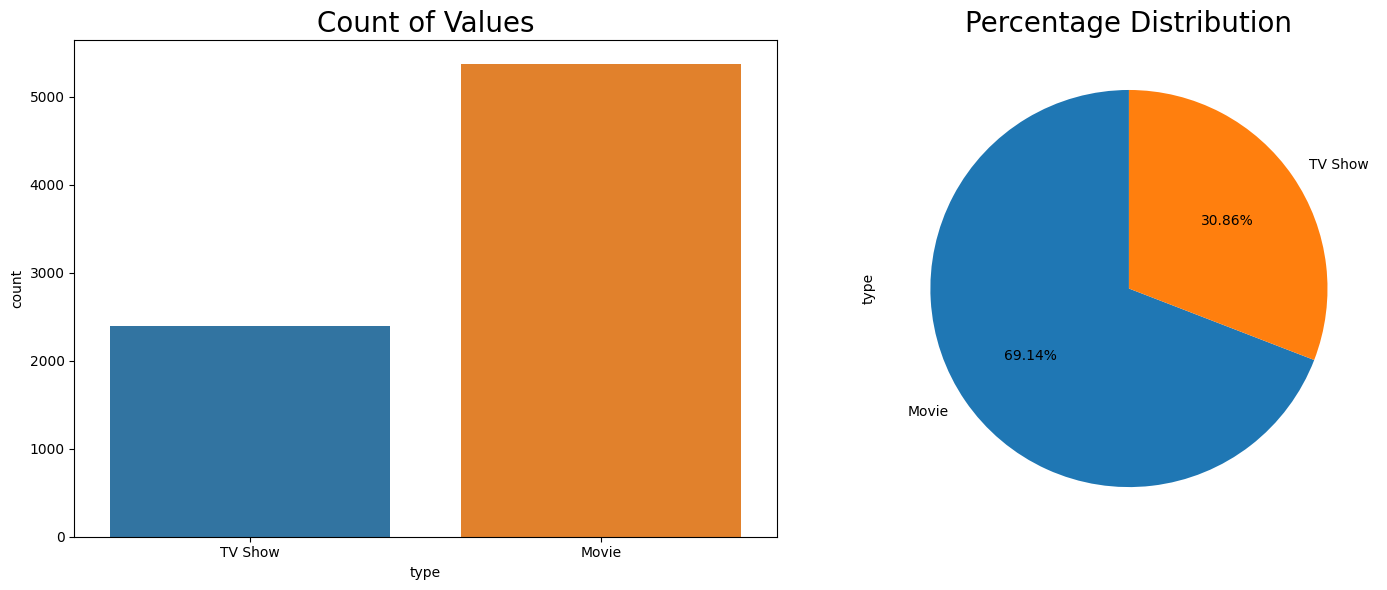

In [19]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# countplot
graph = sns.countplot(x = 'type', data = df, ax=ax[0])
graph.set_title('Count of Values', size=20)

# piechart
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Movies has more number of counts than TV Shows.
31% of the data are from TV shows, while 69% of the data are from movies.

#### Chart - 2  Column: 'title'

In [20]:
# Chart - 2 visualization code
# number of unique values
df['title'].nunique()


7770

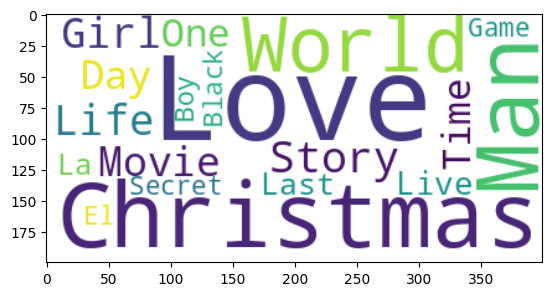

In [21]:
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Words like 'Love', 'Christmas', 'Man', 'World', 'Life', 'Girl', and 'Story' are frequently used in the movie title column.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 Column: 'cast'

In [22]:
# Chart - 3 visualization code

df['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                              No cast
Name: cast, Length: 7770, dtype: object

In [23]:
# seperating actors from cast column
cast = df['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()


No cast             718
Anupam Kher          42
Shah Rukh Khan       35
Naseeruddin Shah     30
Om Puri              30
                   ... 
Mylene Dizon          1
Lorenz Martinez       1
Art Acuña             1
Archie Alemania       1
Rachel Khoo           1
Length: 32837, dtype: int64

In [24]:
print(f"Number of TV Shows actors: {len(df[df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts())}")
print(f"Number of Movies actors: {len(df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().value_counts())}")

Number of TV Shows actors: 13526
Number of Movies actors: 23043


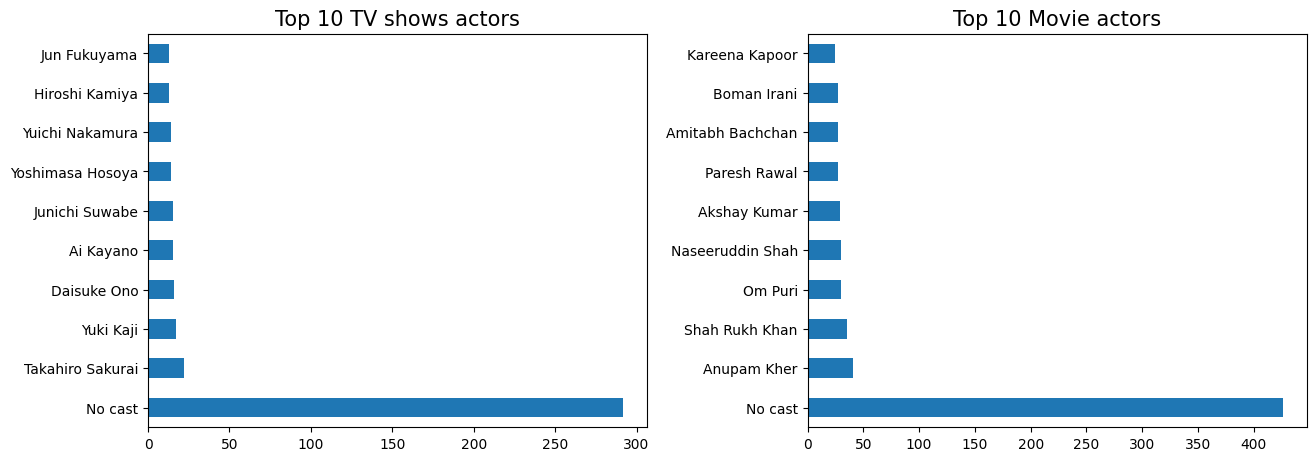

In [25]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* The majority of the roles in the movies are played by Anupam Kher, Shahrukh Khan, and Om Puri.
* In the shows, Takahiro Sakurai, Yuki Kaji, and Daisuke Ono played the most number of roles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 Column: 'country'

In [26]:
# Chart - 4 visualization code
# number of unique values
df['country'].nunique()

681

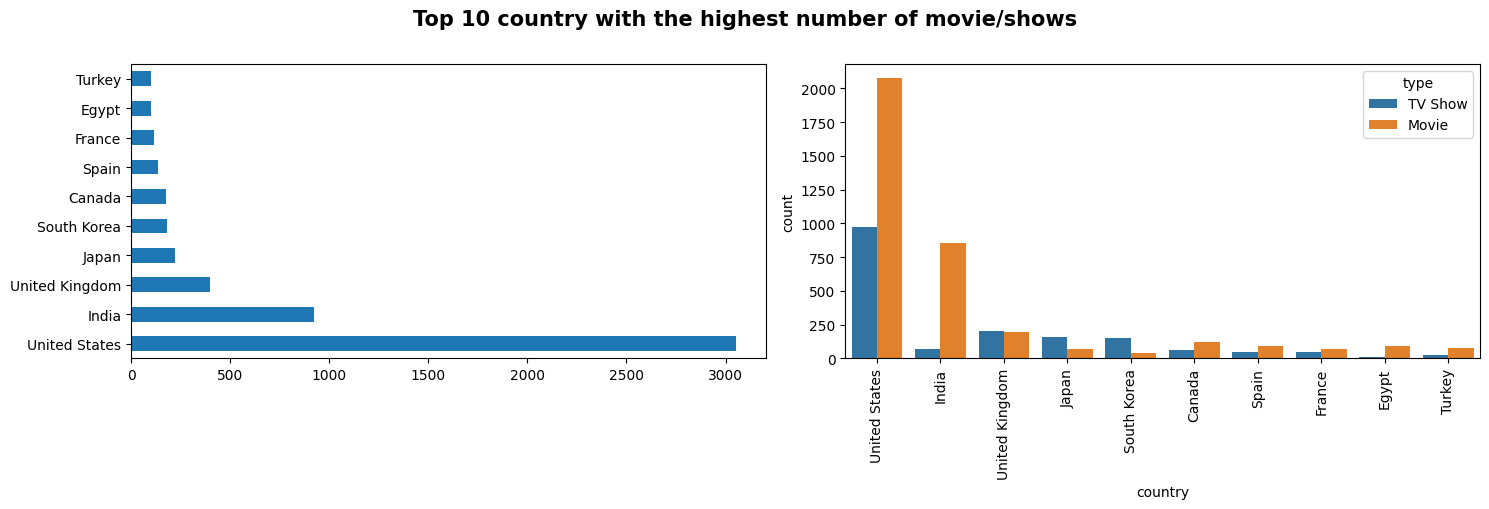

In [27]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="country", data=df, hue='type', order=df['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Observation:**
* The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.
* In India and United State, a greater number of movies are present compared to TV shows.
* In the UK, Japan, and South Korea there are a greater number of TV shows than movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5  'release_year'

In [28]:
# Chart - 5 visualization code
# number of unique values
df['release_year'].nunique()

73

In [29]:
print(f'Oldest release year : {df.release_year.min()}')
print(f'Latest release year : {df.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


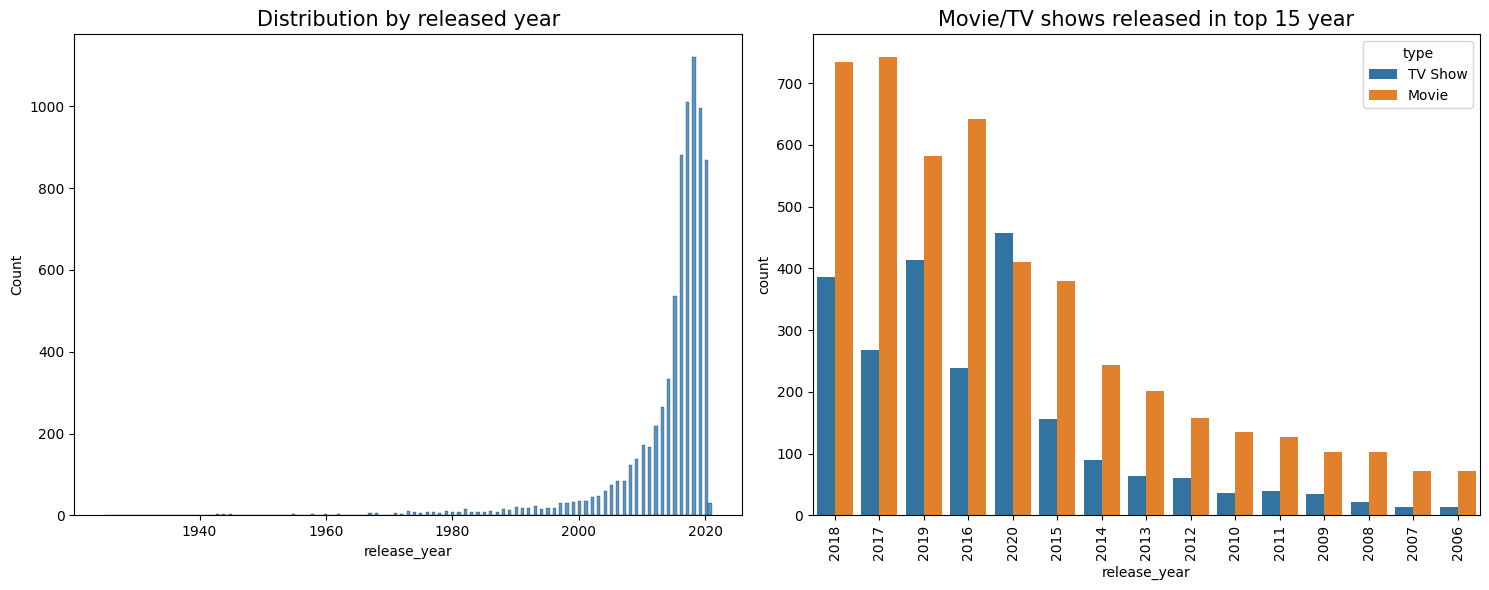

In [30]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Observations:**

* Netflix starts releasing more Movies/TV shows in recent years compared to old ones.
* Most Movies and TV shows are available on Netflix between 2015 and 2020, and the highest are in 2018.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 Column: 'rating'

In [31]:
# Chart - 6 visualization code
# number of unique values
df.rating.nunique()

14

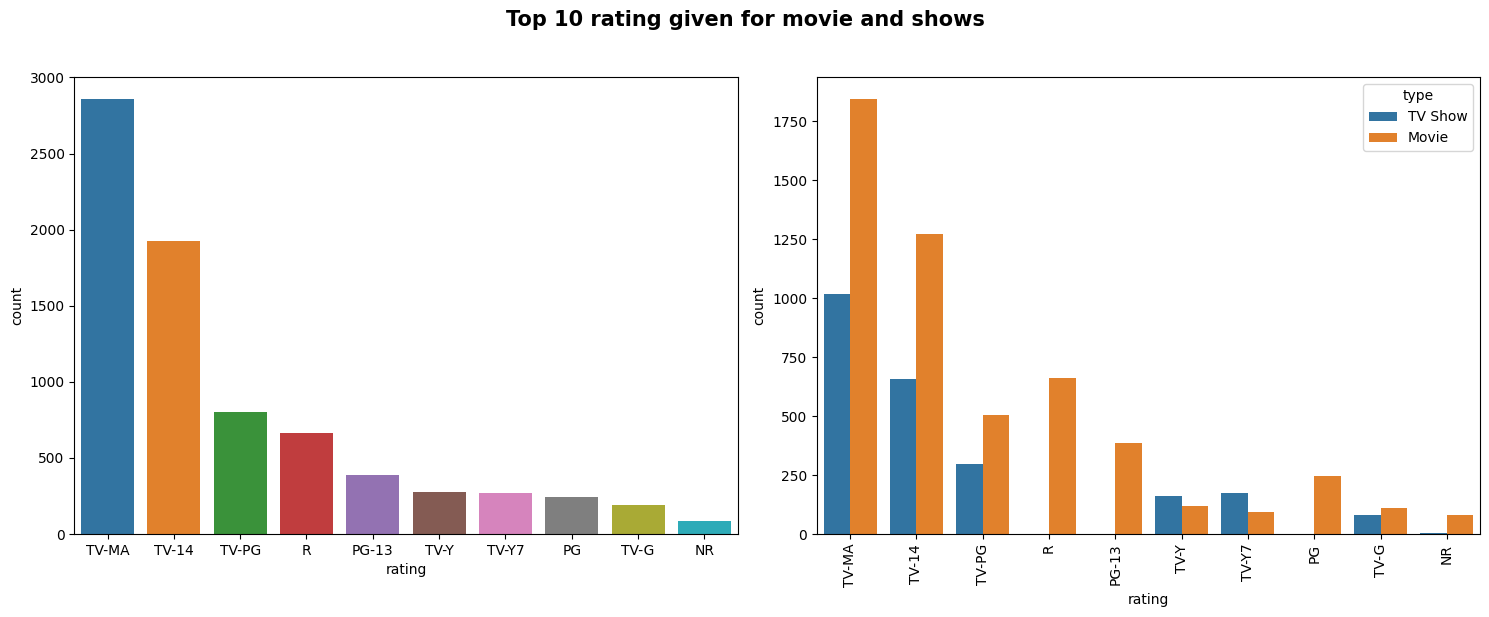

In [32]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Observations:**

* The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience."
* When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7  'listed_in'



In [33]:
# Chart - 7 visualization code
df['listed_in'].head()

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
Name: listed_in, dtype: object

Because this column is a genre column, in order to count the genres, we must separate them.

In [34]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

,genre,count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786


In [35]:
# number of genres present in dataset
len(genres)

42

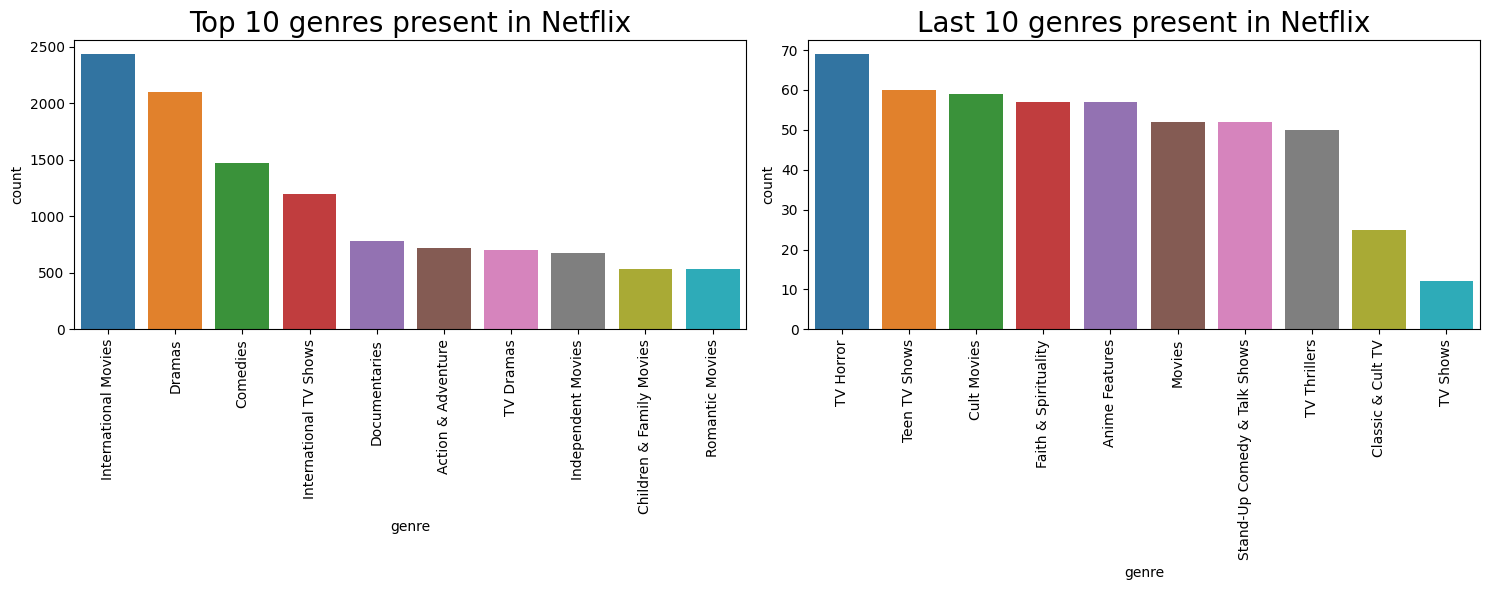

In [36]:
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count', data=genres[:10], ax=ax[0])
top.set_title('Top 10 genres present in Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)

# Last 10 genres
bottom = sns.barplot(x='genre', y = 'count', data=genres[-10:], ax=ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Observations:**

* International Movies, Dramas, and Comedies make up the majority of the genres.
* TV Shows, Classic and cult TV, TV thrillers, Stand-Up comedy, and Talk shows account for the least genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 Netflix Duration

In [37]:
# Chart - 8 visualization code
#Value count for duration column
counts = df.duration.value_counts()
percs = df.duration.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,91 min,94 min,95 min,92 min,97 min,...,13 min,214 min,13 Seasons,9 min,312 min,182 min,224 min,37 min,233 min,191 min
count,1606.000000,378.000000,183.000000,136.000000,131.00000,125.000000,125.000000,119.000000,118.000000,117.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
percentage,0.206692,0.048649,0.023552,0.017503,0.01686,0.016088,0.016088,0.015315,0.015187,0.015058,...,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129


<Axes: title={'center': 'DISTRIBUTION OF TV SHOW DURATION'}, xlabel='duration', ylabel='count'>

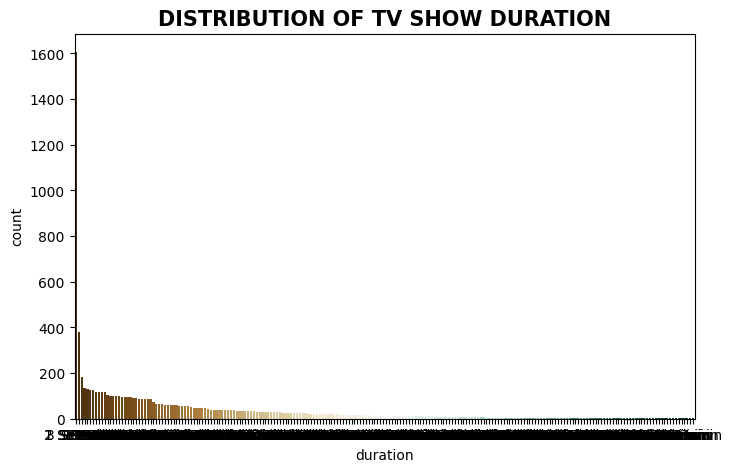

In [39]:
#Analysis on distribution of movie show duration
plt.figure(figsize=(8,5))
plt.title("DISTRIBUTION OF TV SHOW DURATION",fontsize=15,fontweight='bold')
sns.countplot(x=df['duration'],data=df,palette="BrBG",order =df['duration'].value_counts().index)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Observations:

The Christmas season (October, November, December, and January) sees a greater amount of content released. Compared to TV shows, more movies are released each month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 Netflix Genres

In [41]:
# Chart - 9 visualization code
#Value count for genres column
counts = df.listed_in.value_counts()
percs = df.listed_in.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
count,334.000000,321.000000,320.000000,243.000000,215.000000,204.000000,177.00000,172.000000,169.00000,161.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
percentage,0.042986,0.041313,0.041184,0.031274,0.027671,0.026255,0.02278,0.022136,0.02175,0.020721,...,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129


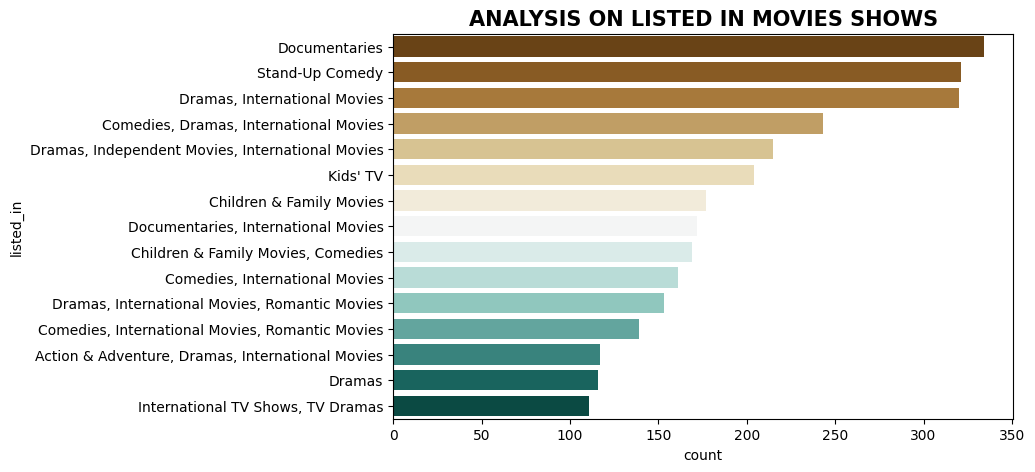

In [42]:
#Analysis listed in movie shows
plt.figure(figsize=(8,5))
sns.countplot(y="listed_in", data=df, palette="BrBG", order=df['listed_in'].value_counts().index[0:15])
plt.title('ANALYSIS ON LISTED IN MOVIES SHOWS', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Observations:

*  The most popular Netflix category is documentaries, which are followed by stand-up comedy, Drams, and foreign films.
*   The most popular Netflix TV show category is kids TV.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [36]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [37]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [38]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [39]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [40]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [41]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [46]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [47]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [48]:
# Expand Contraction

#### 2. Lower Casing

In [49]:
# Lower Casing

#### 3. Removing Punctuations

In [50]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [51]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [52]:
# Remove Stopwords

In [53]:
# Remove White spaces

#### 6. Rephrase Text

In [54]:
# Rephrase Text

#### 7. Tokenization

In [55]:
# Tokenization

#### 8. Text Normalization

In [56]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [57]:
# POS Taging

#### 10. Text Vectorization

In [58]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [59]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [60]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [61]:
# Transform Your data

### 6. Data Scaling

In [62]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [63]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [64]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [65]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [66]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [71]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [74]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [75]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***